In [68]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [14]:
x_train = np.genfromtxt('./ImageClassification/input.csv', delimiter=',')
x_test  = np.genfromtxt('./ImageClassification/input_test.csv', delimiter=',')
y_train = np.genfromtxt('./ImageClassification/labels.csv', delimiter=',')
y_test  = np.genfromtxt('./ImageClassification/labels_test.csv', delimiter=',')



shape of dataset

In [15]:
print("Shape of x_train:",x_train.shape)
print("shape of y_train:",y_train.shape)
print("shape of y_test:",y_test.shape)
print("shape of x_test:",x_test.shape)
print("Unique row lengths in x_train:", {len(row) for row in x_train})
print("Unique row lengths in x_test:", {len(row) for row in x_test})

Shape of x_train: (2000, 30000)
shape of y_train: (2000,)
shape of y_test: (400,)
shape of x_test: (400, 30000)
Unique row lengths in x_train: {30000}
Unique row lengths in x_test: {30000}


In [87]:
x_train = x_train.reshape(-1, 100, 100, 3)
x_test  = x_test.reshape(-1, 100, 100, 3)

y_train = y_train.reshape(-1, 1)
y_test  = y_test.reshape(-1, 1)





In [105]:
x_train = x_train.reshape(-1,100,100,3).astype(np.float32) /250 
x_test  = x_test.reshape(-1,100,100,3).astype(np.float32) /250 


In [106]:
print("shape of x_train:",x_train.shape)
print("shape of y_train:",y_train.shape)
print("shape of x_test:",x_test.shape)
print("shape of y_test:",y_test.shape)

shape of x_train: (2000, 100, 100, 3)
shape of y_train: (2000, 1)
shape of x_test: (400, 100, 100, 3)
shape of y_test: (400, 1)


In [107]:
x_train[1,:]

array([[[4.8599341e-13, 4.7486380e-13, 5.0083294e-13],
        [5.9357976e-13, 5.8245010e-13, 6.0841924e-13],
        [7.3455499e-13, 7.1229567e-13, 7.5681415e-13],
        ...,
        [9.2746839e-13, 9.2375847e-13, 9.1633873e-13],
        [9.4601768e-13, 9.4601768e-13, 9.3859794e-13],
        [9.2746839e-13, 9.2375847e-13, 9.0891894e-13]],

       [[5.1938228e-13, 5.0825267e-13, 5.3422176e-13],
        [4.7115393e-13, 4.6002433e-13, 4.8599341e-13],
        [4.4518480e-13, 4.2292556e-13, 4.6002433e-13],
        ...,
        [9.3117820e-13, 9.3859794e-13, 9.3488802e-13],
        [9.4230786e-13, 9.4601768e-13, 9.3859794e-13],
        [9.4230786e-13, 9.4601768e-13, 9.3117820e-13]],

       [[7.5681415e-13, 7.4939442e-13, 7.6794376e-13],
        [6.9374633e-13, 6.8632659e-13, 7.0487594e-13],
        [5.4535142e-13, 5.2680202e-13, 5.4906128e-13],
        ...,
        [9.2375847e-13, 9.4601768e-13, 9.4601768e-13],
        [8.8294985e-13, 9.1633873e-13, 8.9778933e-13],
        [8.6069064e-13

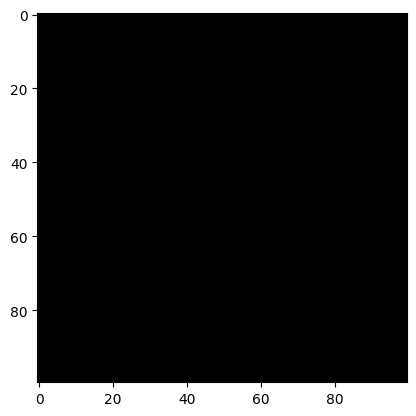

In [109]:
import matplotlib.pyplot  as plt
import random
idx=random.randint(0,len(x_train))

img = (x_train[idx] * 255).astype(np.uint8)
plt.imshow(img)
plt.show()



model 

In [110]:
model=Sequential([
     Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)) ,
     MaxPooling2D((2,2)),
     Conv2D(32,(3,3),activation='relu'),
     MaxPooling2D((2,2)),
     Flatten(),
     Dense(64,activation='relu'),
     Dense(1,activation='sigmoid')
])

In [111]:
model.compile(loss= 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [112]:
model.fit(x_train,y_train,epochs=5,batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.4980 - loss: 0.6933
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.5000 - loss: 0.6932
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.5000 - loss: 0.6932 
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.5000 - loss: 0.6932
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.4970 - loss: 0.6932


In [113]:
model.fit(x_train,y_train,epochs=10,batch_size=64)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.4960 - loss: 0.6932
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.5000 - loss: 0.6932 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.5000 - loss: 0.6932
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.5000 - loss: 0.6932 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.5000 - loss: 0.6932
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.5000 - loss: 0.6933
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.4930 - loss: 0.6932
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.5000 - loss: 0.6932
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.5000 - loss: 0.6932
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.4850 - loss: 0.6932


In [114]:
model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5000 - loss: 0.6931


[0.6931474208831787, 0.5]

making predictions 

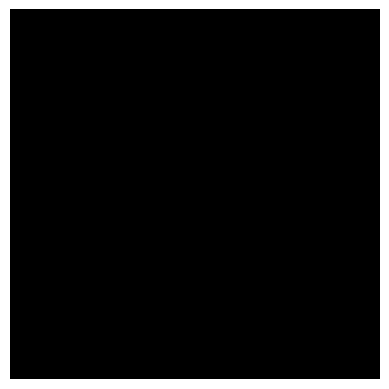

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Prediction: dog (raw: 0.49961832 )
Actual: dog


In [119]:
idx2 = random.randint(0, len(y_test)-1)

# show image
plt.imshow(x_test[idx2])
plt.axis("off")
plt.show()

# predict
y_pred = model.predict(x_test[idx2].reshape(1, 100, 100, 3))[0][0]

# classification
if y_pred > 0.5:
    pred = 'cat'
else:
    pred = 'dog'

print("Prediction:", pred, "(raw:", y_pred, ")")
print("Actual:", 'cat' if y_test[idx2]==1 else 'dog')
